<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:




4. Repita la pregunta anterior observando las especies.




##1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [1]:
#Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:


# Cargar el dataset
df = sns.load_dataset('penguins')

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
#Ver información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# Ver estadísticas descriptivas
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
# Ver cuántas especies diferentes hay
df['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


In [6]:
# Se agrupa por especie y se calculan los promedios:
df.groupby('species').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


##2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.

In [7]:
#Se eliminan las filas con valores ausentes:

df_limpio=df.dropna()
df_limpio.info()

# Resultado esperado:
print('\n El nuevo DataFrame tiene ahora 333 filas.\n Todas las columnas tienen 333 valores no nulos.\n Se eliminaron las 11 filas que tenían al menos un valor faltante.')

df = df_limpio.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB

 El nuevo DataFrame tiene ahora 333 filas.
 Todas las columnas tienen 333 valores no nulos.
 Se eliminaron las 11 filas que tenían al menos un valor faltante.


##3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?

In [8]:
#Veamos cuántos pinguinos hay por cada isla:

df = df_limpio.copy()
N_penguin_isla=df['island'].value_counts()
N_penguin_isla


,count
island,
Biscoe,163
Dream,123
Torgersen,47


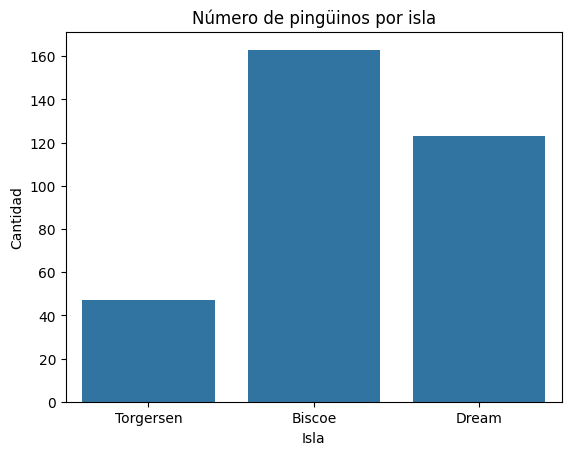

,count
island,
Biscoe,163
Dream,123
Torgersen,47


In [9]:
#Para visualizar el desbalance (si lo hay), podemos usar un gráfico de barras:

sns.countplot(data=df, x='island')
plt.title("Número de pingüinos por isla")
plt.ylabel("Cantidad")
plt.xlabel("Isla")
plt.show()
N_penguin_isla

In [10]:
isla_mayor = df['island'].value_counts()
isla_menor = df['island'].value_counts()
print(f"La isla con más pingüinos es:", isla_mayor.idxmax(),f'con {isla_mayor.max()} pinguinos')
print(f"La isla con menos pingüinos es:", isla_menor.idxmin(),f'con {isla_menor.min()} pinguinos')

La isla con más pingüinos es: Biscoe con 163 pinguinos
La isla con menos pingüinos es: Torgersen con 47 pinguinos


##4) ¿Cuál es la especie con más pingüinos en el dataset?. ¿Hay un desbalance en el número de pingüinos por especie?

In [41]:
N_penguin_especie=df['species'].value_counts()
N_penguin_especie
#

especie_mayor = df['species'].value_counts()
especie_menor = df['species'].value_counts()
print(f"La especie con más pingüinos es:", especie_mayor.idxmax(),f'con {especie_mayor.max()} pinguinos')
print(f"La especie con menos pingüinos es:", especie_menor.idxmin(),f'con {especie_menor.min()} pinguinos')
print("\nSe observa un desbalance en la especie de pinguinos más numerosa, que duplica a la especie menos numerosa.")

La especie con más pingüinos es: Adelie con 146 pinguinos
La especie con menos pingüinos es: Chinstrap con 68 pinguinos

Se observa un desbalance en la especie de pinguinos más numerosa, que duplica a la especie menos numerosa.


##5)¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

In [12]:
df.groupby('species')['bill_length_mm'].agg(Media_bill_length='mean',Std_bill_length='std')

,Media_bill_length,Std_bill_length
species,,
Adelie,38.823973,2.662597
Chinstrap,48.833824,3.339256
Gentoo,47.568067,3.106116


##6 ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [13]:
# Busquemos el penguino con el pico mas largo:
pico_max=df['bill_length_mm'].max()


# Ahora filtramos el data frame con este valor:
penguino_pico_max=df[df['bill_length_mm']==pico_max]
penguino_pico_max

especie = penguino_pico_max.iloc[0]['species']
longitud = penguino_pico_max.iloc[0]['bill_length_mm']

print(f"El pingüino con el pico más largo mide {longitud} mm y es de la especie {especie}.")

El pingüino con el pico más largo mide 59.6 mm y es de la especie Gentoo.


##7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?

<ipython-input-14-0787ff11554b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='species', y='body_mass_g', palette='Set2')


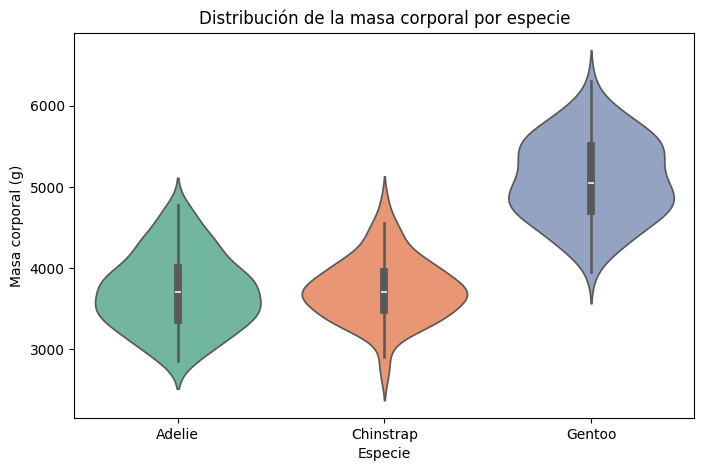

In [14]:
#La mejor forma de ver la distribución es usando un violinplot o un boxplot. Ambos muestran la dispersión, pero el violinplot te da también una idea de la densidad.
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='species', y='body_mass_g', palette='Set2')
plt.title('Distribución de la masa corporal por especie')
plt.xlabel('Especie')
plt.ylabel('Masa corporal (g)')
plt.show()

<ipython-input-15-8d07f354e89b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y='body_mass_g', palette='Set2')


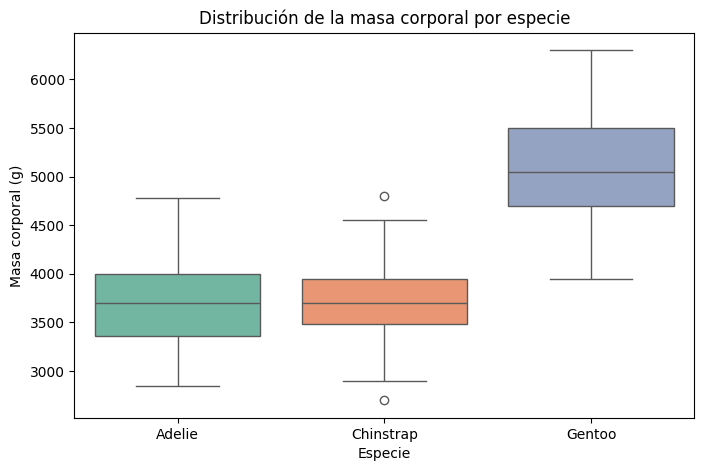

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='species', y='body_mass_g', palette='Set2')
plt.title('Distribución de la masa corporal por especie')
plt.xlabel('Especie')
plt.ylabel('Masa corporal (g)')
plt.show()

##8. Describa la distribución [de la masa corporal] con ayuda de la media y la desviación estándar.

In [16]:
df.groupby('species')['body_mass_g'].agg(media='mean', desviacion='std')


,media,desviacion
species,,
Adelie,3706.164384,458.620135
Chinstrap,3733.088235,384.335081
Gentoo,5092.436975,501.476154


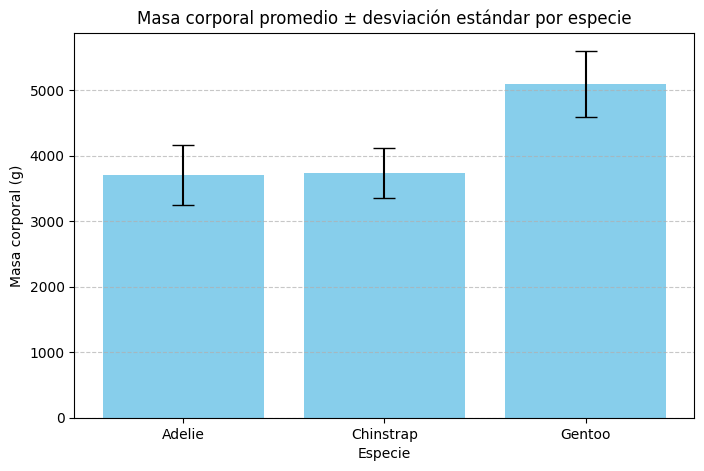

In [17]:
import matplotlib.pyplot as plt

# Estadísticas por especie
stats = df.groupby('species')['body_mass_g'].agg(['mean', 'std']).reset_index()

# Gráfico
plt.figure(figsize=(8, 5))
plt.bar(stats['species'], stats['mean'], yerr=stats['std'], capsize=8, color='skyblue')
plt.title('Masa corporal promedio ± desviación estándar por especie')
plt.ylabel('Masa corporal (g)')
plt.xlabel('Especie')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

In [18]:
 #Agrupamos por sexo y calcular media y desviación estándar:

df.groupby('sex')['body_mass_g'].agg(media='mean', desviacion='std')


,media,desviacion
sex,,
Female,3862.272727,666.172050
Male,4545.684524,787.628884


In [19]:
media_machos = float(df[df['sex'] == 'Male']['body_mass_g'].mean())
media_hembras = float(df[df['sex'] == 'Female']['body_mass_g'].mean())

desviacion_machos = float(df[df['sex'] == 'Male']['body_mass_g'].std())
desviacion_hembras = float(df[df['sex'] == 'Female']['body_mass_g'].std())

In [20]:
print("Los machos tienen una media de masa corporal de", np.round(media_machos,3), "g y una desviación estándar de", np.round(desviacion_machos,3), "g.")
print("Las hembras tienen una media de masa corporal de", np.round(media_hembras,3), "g y una desviación estándar de", np.round(desviacion_hembras,3), "g.")

Los machos tienen una media de masa corporal de 4545.685 g y una desviación estándar de 787.629 g.
Las hembras tienen una media de masa corporal de 3862.273 g y una desviación estándar de 666.172 g.


##10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

In [21]:
#Agrupa,os por especie y calculamos la  media y la desviación estándar para la longitud de las aletas:
df.groupby('species')['flipper_length_mm'].agg(media='mean', std='std')

print("La media de la longitud de las aletas por especie es:")
print(df.groupby('species')['flipper_length_mm'].mean(),'\n')
print(df.groupby('species')['flipper_length_mm'].std())

La media de la longitud de las aletas por especie es:
species
Adelie       190.102740
Chinstrap    195.823529
Gentoo       217.235294
Name: flipper_length_mm, dtype: float64 

species
Adelie       6.521825
Chinstrap    7.131894
Gentoo       6.585431
Name: flipper_length_mm, dtype: float64


In [22]:
df[df['species'] == 'Adelie']['flipper_length_mm'].mean()

np.float64(190.1027397260274)

##11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [23]:
#Longitud mínima y máxima de la aleta entre las tres especies de pingüinos:
df.groupby('species')['flipper_length_mm'].agg(longitud_min='min', longitud_max='max')

,longitud_min,longitud_max
species,,
Adelie,172.0,210.0
Chinstrap,178.0,212.0
Gentoo,203.0,231.0


##12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?


In [24]:
#Variacion de la longitud del pico entre las diferentes especies de pingüinos en las distintas islas:

df.groupby(['species', 'island'])['bill_length_mm'].mean().unstack()


island,Biscoe,Dream,Torgersen
species,,,
Adelie,38.975000,38.520000,39.038298
Chinstrap,NaN,48.833824,NaN
Gentoo,47.568067,NaN,NaN


Los valores NaN indican que tal especie no habita en la respectiva isla


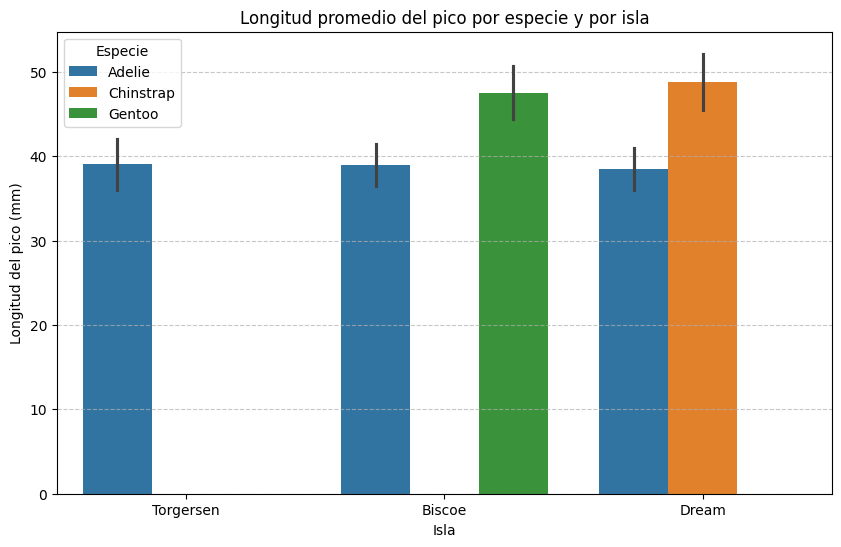

In [25]:
print("Los valores NaN indican que tal especie no habita en la respectiva isla")


plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='island', y='bill_length_mm', hue='species', errorbar='sd')
plt.title('Longitud promedio del pico por especie y por isla')
plt.ylabel('Longitud del pico (mm)')
plt.xlabel('Isla')
plt.legend(title='Especie')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Tendencias y visualizacion de las variables


##13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [26]:
#Comparar la variabilidad (desviación estándar) de la longitud del pico (bill_length_mm) entre especies dentro de cada isla.

# Agrupar por isla y especie, calcular estadísticas de longitud del pico
stats = df.groupby(['island', 'species'])['bill_length_mm'].agg(['mean', 'std']).reset_index()

# Mostrar los resultados
print(stats)

      island    species       mean       std
0     Biscoe     Adelie  38.975000  2.480916
1     Biscoe     Gentoo  47.568067  3.106116
2      Dream     Adelie  38.520000  2.484276
3      Dream  Chinstrap  48.833824  3.339256
4  Torgersen     Adelie  39.038298  3.028097


In [27]:
# Para determinar la variación total por isla (ejemplo: usando el rango de medias por isla)
variacion_por_isla = stats.groupby('island')['mean'].agg(lambda x: x.max() - x.min()).sort_values(ascending=False)
print("\nVariación (rango) de longitud del pico por isla:")
print(variacion_por_isla)


Variación (rango) de longitud del pico por isla:
island
Dream        10.313824
Biscoe        8.593067
Torgersen     0.000000
Name: mean, dtype: float64


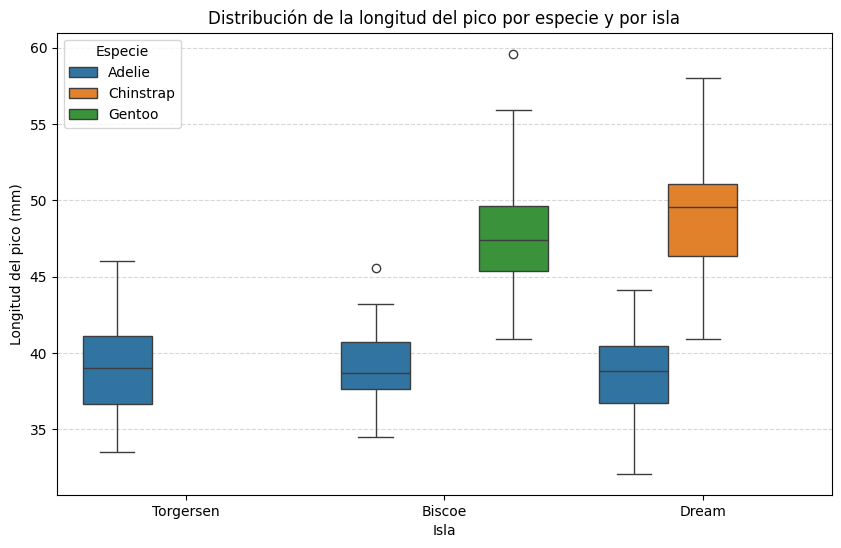

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='island', y='bill_length_mm', hue='species')
plt.title('Distribución de la longitud del pico por especie y por isla')
plt.xlabel('Isla')
plt.ylabel('Longitud del pico (mm)')
plt.legend(title='Especie')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [29]:
# Agrupar por isla y especie, obtener promedio de longitud del pico
mean_bill_lengths = df.groupby(['island', 'species'])['bill_length_mm'].mean().unstack()

# Calcular la variación (máximo - mínimo) por isla
variation_by_island = mean_bill_lengths.max(axis=1) - mean_bill_lengths.min(axis=1)

# Mostrar la isla con mayor variación
isla_mayor_variacion = variation_by_island.idxmax()
variacion_valor = variation_by_island.max()

print(f"La isla con mayor variación en longitud del pico es {isla_mayor_variacion}, con una diferencia de {variacion_valor:.2f} mm entre especies.")
variation_by_island

La isla con mayor variación en longitud del pico es Dream, con una diferencia de 10.31 mm entre especies.


,0
island,
Biscoe,8.593067
Dream,10.313824
Torgersen,0.000000


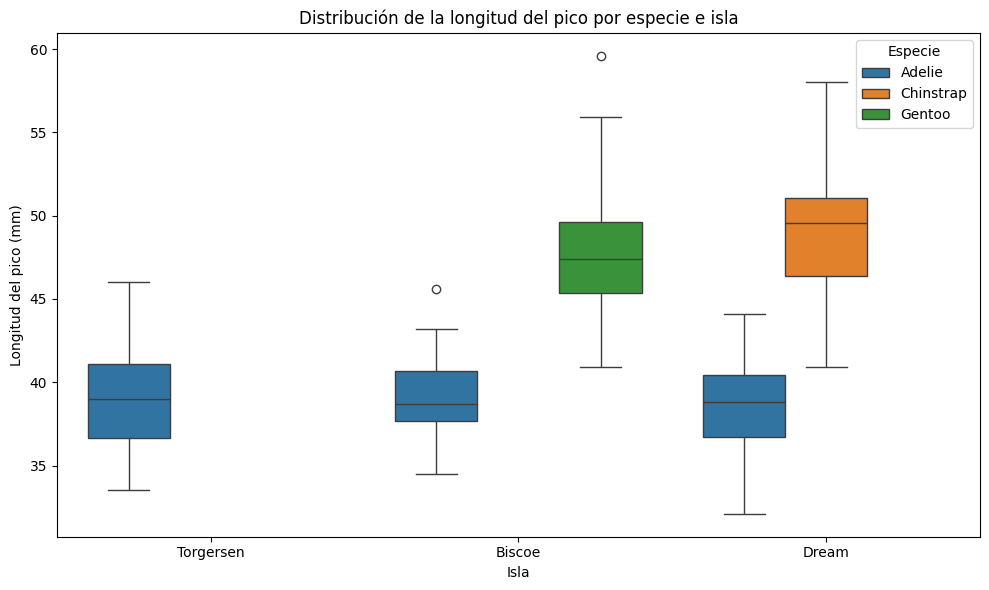

In [30]:
# Gráfico de boxplot para visualizar la longitud del pico por especie e isla
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='island', y='bill_length_mm', hue='species')

plt.title("Distribución de la longitud del pico por especie e isla")
plt.xlabel("Isla")
plt.ylabel("Longitud del pico (mm)")
plt.legend(title="Especie")
plt.tight_layout()
plt.show()

##14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.


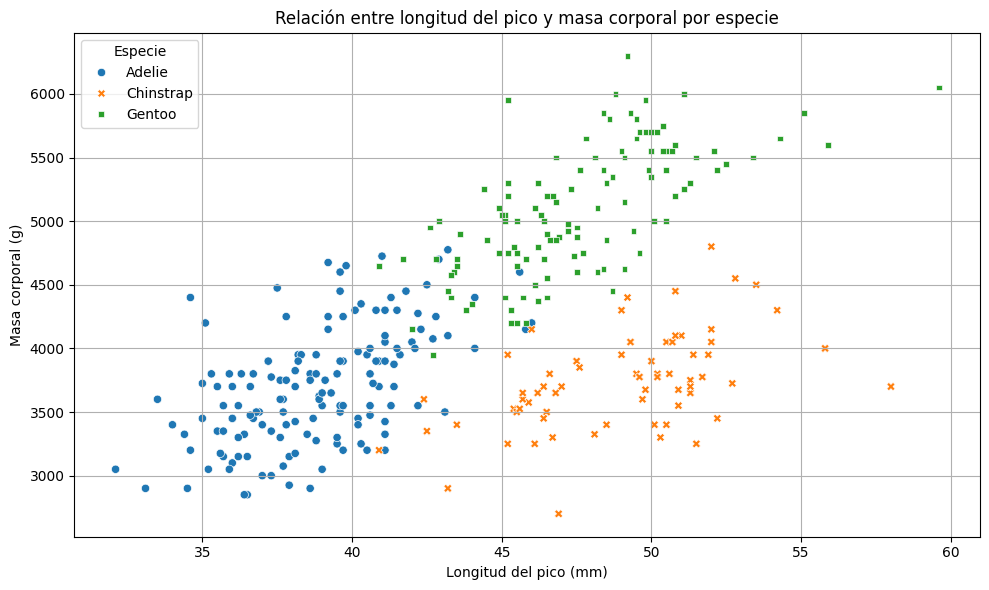

In [31]:
# Gráfico de dispersión general
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species', style='species')
plt.title('Relación entre longitud del pico y masa corporal por especie')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.legend(title='Especie')
plt.grid(True)
plt.tight_layout()
plt.show()

##15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?

In [45]:
#Correlacion con el coeficiente de Pearson:

# Calcular correlación por especie
print("Correlaciones por especie entre longitud del pico y masa corporal:")

corr_array=np.zeros(3)
n=0
for species in df['species'].unique():
    subset = df[df['species'] == species]
    corr = subset['bill_length_mm'].corr(subset['body_mass_g'])
    corr=float(corr)
    corr_array[n]=corr
    n=n+1

    print(f"{species}: {corr:.2f}")
print("\nDado que los 3 coeficientes de correlacion son mayores a 0.5, podriamos afirmar que  existe una correlación\n significativa entre la longitud del pico y la masa corporal de cada especie de pinguino .")

corr_array

Correlaciones por especie entre longitud del pico y masa corporal:
Adelie: 0.54
Chinstrap: 0.51
Gentoo: 0.67

Dado que los 3 coeficientes de correlacion son mayores a 0.5, podriamos afirmar que  existe una correlación
 significativa entre la longitud del pico y la masa corporal de cada especie de pinguino .


array([0.54427641, 0.51363835, 0.66673022])

## Relación entre caracteristicas de los pingüinos


##16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?


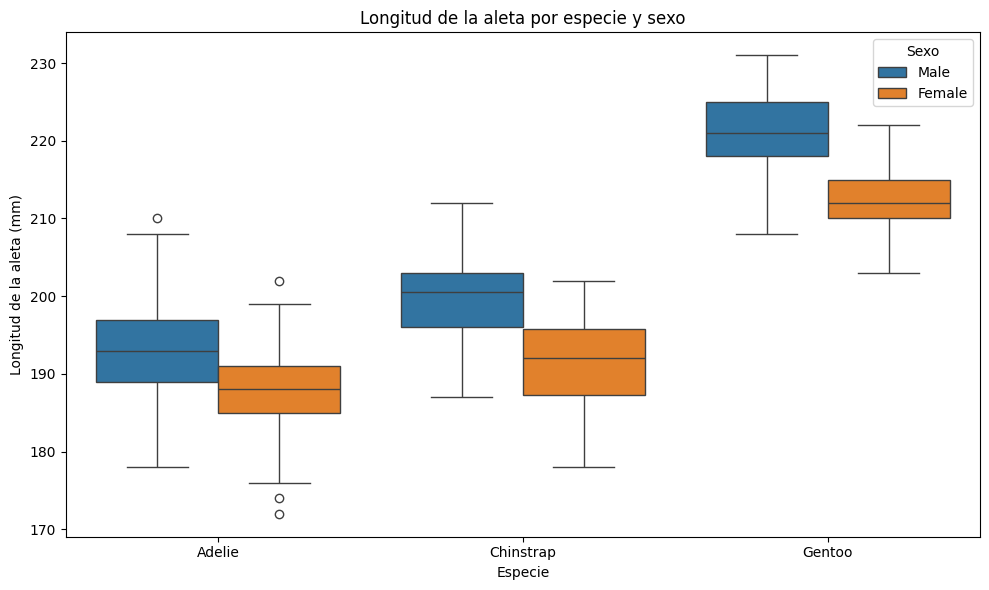

In [39]:
"""Se analiza cómo varía la longitud de la aleta entre los sexos dentro de cada especie, y eso se logra:

Visualmente con un gráfico como boxplot, que muestra:

La mediana, los cuartiles, los valores extremos.

Si los machos suelen tener aletas más largas que las hembras (o viceversa)."""


# Visualizar con boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='flipper_length_mm', hue='sex')

plt.title('Longitud de la aleta por especie y sexo')
plt.xlabel('Especie')
plt.ylabel('Longitud de la aleta (mm)')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

Para cada una de las tres especies (Adelie, Chinstrap y Gentoo), los machos tienden a tener una longitud de aleta mayor que las hembras. Esto sugiere una diferencia sexual consistente en el tamaño de las aletas.

Gentoo tiene las aletas más largas:
Tanto machos como hembras de la especie Gentoo presentan las aletas más largas entre todas las especies.

Adelie tiene las aletas más cortas:
En comparación, los pingüinos Adelie muestran las aletas más cortas, con diferencia tanto en machos como en hembras.

La dispersión de los datos (ancho de las cajas y bigotes) es más pronunciada en Gentoo.

Hay varios outliers (puntos fuera de rango típico) en todas las especies, especialmente entre los Adelie.

## 17. Test de hipótesis:Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.




Planteamiento de hipótesis:
Queremos saber si la correlación observada entre la longitud del pico y la masa corporal es estadísticamente significativa o podría deberse al azar.

Hipótesis nula
𝐻_0
​
 : No hay correlación entre las variables →
𝜌
=
0


Hipótesis alternativa
𝐻
1
H
1
​
 : Sí hay correlación →
𝜌
≠
0


In [48]:
corr_array



np.float64(0.589451110176949)

In [58]:
#Definicion de parámetros
from scipy import stats


r=corr_array
n=df[['bill_length_mm', 'body_mass_g']].shape[0]
dfree = n - 2


t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)            # Estadistico de prueba
α=0.05                                                     # Nivel de significancia
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=dfree))

t_stat

array([11.80375632, 10.8913249 , 16.2754692 ])

In [61]:
import scipy.stats as stats
import numpy as np
import pandas as pd

# Crear un DataFrame de ejemplo si no tienes uno cargado
# df = sns.load_dataset('penguins')

# Filtrar las columnas necesarias y eliminar filas con valores faltantes
df_corr = df[['species', 'bill_length_mm', 'body_mass_g']].dropna()

# Nivel de significancia
alpha = 0.05

# Diccionario para guardar los resultados
resultados = {}

# Recorremos cada especie por separado
for especie in df_corr['species'].unique():
    datos = df_corr[df_corr['species'] == especie]

    n = len(datos)
    r, _ = stats.pearsonr(datos['bill_length_mm'], datos['body_mass_g'])

    # Estadístico t para prueba de hipótesis sobre correlación
    t = r * np.sqrt((n - 2) / (1 - r**2))

    # Valor-p de dos colas
    p_value = 2 * (1 - stats.t.cdf(abs(t), df=n - 2))

    # Resultado de la hipótesis
    conclusion = "Rechazamos H0 (correlación significativa)" if p_value < alpha else "No se rechaza H0 (no significativa)"

    # Guardar resultados
    resultados[especie] = {
        'n': n,
        'r': round(r, 3),
        't': round(t, 3),
        'p-value': p_value,
        'Conclusión': conclusion
    }

# Mostrar resultados
for especie, valores in resultados.items():
    print(f"\nEspecie: {especie}")
    for clave, valor in valores.items():
        print(f"{clave}: {valor}")



Especie: Adelie
n: 146
r: 0.544
t: 7.786
p-value: 1.2418954753457001e-12
Conclusión: Rechazamos H0 (correlación significativa)

Especie: Chinstrap
n: 68
r: 0.514
t: 4.863
p-value: 7.4804919916182655e-06
Conclusión: Rechazamos H0 (correlación significativa)

Especie: Gentoo
n: 119
r: 0.667
t: 9.676
p-value: 0.0
Conclusión: Rechazamos H0 (correlación significativa)
